In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
def import_data(path,file):
    file_path = os.path.join(path,file)
    return pd.read_csv(file_path)

In [3]:
os.getcwd()

'C:\\Users\\user\\Documents\\AI\\Real-Life_ML'

In [4]:
path = os.path.join('Datasets','Titanic')
train_file = 'train.csv'
test_file = 'test.csv'
X_train = import_data(path,train_file)
X_test = import_data(path,test_file)
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
median = X_train['Age'].median()
X_train['Age'].fillna(median, inplace = True)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X_train['Age_Pclass'] = X_train['Age']*X_train['Pclass']

In [9]:
X_train['Ticket'].value_counts(dropna=False)

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
           ..
14311       1
345778      1
374910      1
364511      1
349203      1
Name: Ticket, Length: 681, dtype: int64

In [10]:
X_train['Cabin'].value_counts(dropna = False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
E46              1
C46              1
C99              1
D46              1
C95              1
Name: Cabin, Length: 148, dtype: int64

In [11]:
sum((X_train['Parch']==0) & (X_train['Survived']==1))

233

In [12]:
sum((X_train['Parch']!=0) & (X_train['Survived']==1))

109

In [13]:
X_train['Survived'].value_counts()/len(X_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [14]:
X_train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [15]:
y = X_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
X_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Age_Pclass    -0.324559
Name: Survived, dtype: float64

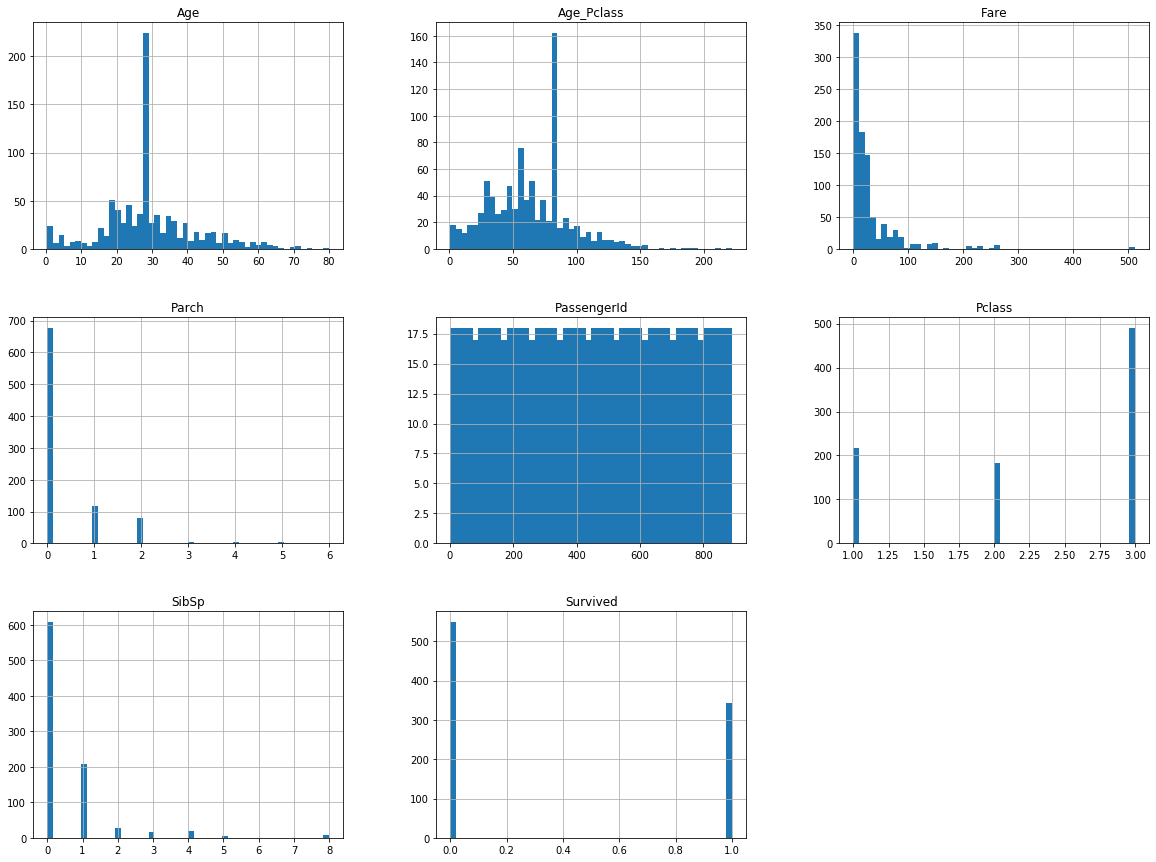

In [17]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_attribs = ['Age','SibSp','Parch','Fare','Age_Pclass']
num_pipeline = Pipeline([
   ( 'imputer', SimpleImputer(strategy='median'))
])
num_pipeline

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0))],
         verbose=False)

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                      index = X.columns)
        return self
        
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)
            

In [111]:
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ['Pclass', 'Sex', 'Embarked']
cat_pipeline = Pipeline([
    ('frequent_imputer', MostFrequentImputer()),
    ('Onehot', OneHotEncoder(sparse = False))
])

cat_pipeline

Pipeline(memory=None,
         steps=[('frequent_imputer', MostFrequentImputer()),
                ('Onehot',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=False))],
         verbose=False)

In [112]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',cat_pipeline,cat_attribs)
])

X_train_final = full_pipeline.fit_transform(X_train)

In [113]:
X_train_final[:5]

array([[ 22.    ,   1.    ,   0.    ,   7.25  ,  66.    ,   0.    ,
          0.    ,   1.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          1.    ],
       [ 38.    ,   1.    ,   0.    ,  71.2833,  38.    ,   1.    ,
          0.    ,   0.    ,   1.    ,   0.    ,   1.    ,   0.    ,
          0.    ],
       [ 26.    ,   0.    ,   0.    ,   7.925 ,  78.    ,   0.    ,
          0.    ,   1.    ,   1.    ,   0.    ,   0.    ,   0.    ,
          1.    ],
       [ 35.    ,   1.    ,   0.    ,  53.1   ,  35.    ,   1.    ,
          0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
          1.    ],
       [ 35.    ,   0.    ,   0.    ,   8.05  , 105.    ,   0.    ,
          0.    ,   1.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          1.    ]])

In [114]:
X_train_final.shape

(891, 13)

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [{'C':[1, 1.5, 2, 2.5, 2.8, 3.0 ],
               'gamma':['auto']}]
svc = SVC()

grid_search = GridSearchCV(svc, param_grid=param_grid,
                          cv=10, return_train_score=False)
grid_search.fit(X_train_final, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 1.5, 2, 2.5, 2.8, 3.0], 'gamma': ['auto']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
grid_search.best_params_

{'C': 3.0, 'gamma': 'auto'}

In [117]:
svc_best_model = grid_search.best_estimator_
svc_best_model

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079844,0.004664,0.008608,0.007367,1,auto,"{'C': 1, 'gamma': 'auto'}",0.677778,0.633333,0.662921,0.606742,0.775281,0.674157,0.719101,0.741573,0.674157,0.704545,0.686869,0.047361,6
1,0.069375,0.008322,0.005285,0.006990,1.5,auto,"{'C': 1.5, 'gamma': 'auto'}",0.666667,0.633333,0.662921,0.640449,0.797753,0.662921,0.696629,0.764045,0.674157,0.738636,0.693603,0.052236,5
2,0.072997,0.011552,0.004687,0.007159,2,auto,"{'C': 2, 'gamma': 'auto'}",0.677778,0.677778,0.685393,0.651685,0.797753,0.662921,0.707865,0.752809,0.685393,0.727273,0.702581,0.042649,4
3,0.097701,0.005223,0.008264,0.005078,2.5,auto,"{'C': 2.5, 'gamma': 'auto'}",0.688889,0.711111,0.696629,0.662921,0.820225,0.640449,0.719101,0.764045,0.685393,0.727273,0.711560,0.048669,2
4,0.095337,0.009377,0.007677,0.006079,2.8,auto,"{'C': 2.8, 'gamma': 'auto'}",0.677778,0.711111,0.696629,0.662921,0.831461,0.651685,0.719101,0.752809,0.685393,0.727273,0.711560,0.049360,2
5,0.085920,0.010476,0.006246,0.007650,3,auto,"{'C': 3.0, 'gamma': 'auto'}",0.677778,0.711111,0.696629,0.662921,0.831461,0.651685,0.741573,0.752809,0.685393,0.727273,0.713805,0.050156,1


In [119]:
from sklearn.model_selection import cross_val_score
svc_best_model.fit(X_train_final, y)
svm_scores = cross_val_score(svc_best_model, X_train_final, y,
                          cv=10)
svm_scores.mean()

0.7138633526273976

In [120]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [ 
    {'n_estimators': [30, 35, 40, 45, 50], 'max_features': [4, 7, 9,11, 13]}
    ]
    
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf,param_grid=param_grid,
                           cv=10)
grid_search.fit(X_train_final, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [121]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [122]:
forest_clf_best = grid_search.best_estimator_
forest_clf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print((mean_score), params)

0.8103254769921436 {'max_features': 4, 'n_estimators': 30}
0.8114478114478114 {'max_features': 4, 'n_estimators': 35}
0.8080808080808081 {'max_features': 4, 'n_estimators': 40}
0.8170594837261503 {'max_features': 4, 'n_estimators': 45}
0.8237934904601572 {'max_features': 4, 'n_estimators': 50}
0.813692480359147 {'max_features': 7, 'n_estimators': 30}
0.813692480359147 {'max_features': 7, 'n_estimators': 35}
0.8204264870931538 {'max_features': 7, 'n_estimators': 40}
0.813692480359147 {'max_features': 7, 'n_estimators': 45}
0.8114478114478114 {'max_features': 7, 'n_estimators': 50}
0.8114478114478114 {'max_features': 9, 'n_estimators': 30}
0.8114478114478114 {'max_features': 9, 'n_estimators': 35}
0.8170594837261503 {'max_features': 9, 'n_estimators': 40}
0.8125701459034792 {'max_features': 9, 'n_estimators': 45}
0.8148148148148148 {'max_features': 9, 'n_estimators': 50}
0.8125701459034792 {'max_features': 11, 'n_estimators': 30}
0.8237934904601572 {'max_features': 11, 'n_estimators': 35

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_clf_best.fit(X_train_final, y)
forest_scores = cross_val_score(forest_clf_best, X_train_final, y, cv=10)
forest_scores.mean()

0.8227933832709112

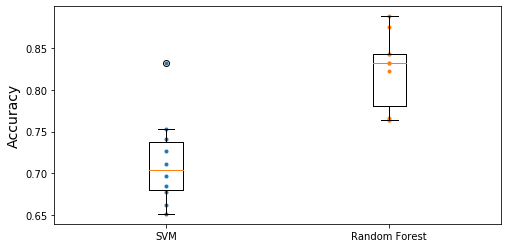

In [139]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()